# Validação do modelo de Churn
* Aplicado o Recente em todos e utilizando o cálculo de períodos.
---

**Autor(a):** Sabrina Bruni de Souza Faria

## Importando Bibliotecas

In [1]:
import pandas as pd
import csv
from funcoesAuxiliares import *

## Leitura dos dados

In [12]:
df = pd.read_csv('Arquivos/TesteTreinoChurnTrans.csv')
df.head(5)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Avaliacao,resultado
61,459,1.774394,2.000000,2.000000,1.674419,1,churn
459,3888,1.673269,2.000000,2.000000,1.618375,1,churn
463,2029,1.857354,2.000000,2.000000,1.744681,1,churn
681,1589,1.359621,1.975586,1.995656,1.375000,1,churn
783,2691,1.210786,1.959391,1.990249,1.305970,1,churn
887,799,1.876483,2.000000,2.000000,1.764259,1,churn
928,2180,1.791115,2.000000,2.000000,1.685824,1,churn
1815,1720,1.933579,2.000000,2.000000,1.822222,1,churn
2235,3814,1.797932,2.000000,2.000000,1.689189,1,churn
2513,236,1.720052,2.000000,2.000000,1.632353,1,não churn


In [3]:
df.describe()

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Avaliacao
count,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000
mean,2786.067556,0.323889,4.573881e-01,0.514958,0.343330,0.004000
std,2313.811984,0.134725,2.667173e-01,0.311445,0.127541,0.063126
min,1.000000,0.042839,1.110223e-16,0.000000,0.095238,0.000000
25%,1182.750000,0.255224,2.661840e-01,0.236834,0.273810,0.000000
50%,2368.000000,0.310149,5.333904e-01,0.643916,0.329524,0.000000
75%,3552.250000,0.371143,6.281308e-01,0.717964,0.387097,0.000000
max,11382.000000,1.933579,2.000000e+00,2.000000,1.840708,1.000000


## Variável de decisão

In [4]:
limite = 0.6

## Ajustando os dados

In [5]:
df["resultado"] = df['resultado'].apply(lambda x: 1.0 if x == "churn" else 0.0)
df["churnLinear"] = df["churnLinear"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_2"] = df["churnExponencial_2"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_e"] = df["churnExponencial_e"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnRecente"] = df["churnRecente"].apply(lambda x: 1.0 if x >= limite else 0.0)
df.head(5)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Avaliacao,resultado
0,2378,0.0,0.0,0.0,0.0,0,0.0
1,576,0.0,1.0,1.0,0.0,0,0.0
2,704,0.0,0.0,1.0,0.0,0,0.0
3,3818,0.0,0.0,1.0,0.0,0,0.0
4,1972,0.0,0.0,1.0,0.0,0,0.0


## Salvando o dataframe de churn e resultado ajustados em um arquivo CSV

In [6]:
df.to_csv( "Arquivos/TesteTreinoChurnAjustadoTrans.csv", index = False, header = True, quoting = csv.QUOTE_NONNUMERIC )

## Visualizando Estatísticas Descritivas

In [7]:
df.describe()

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Avaliacao,resultado
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2786.067556,0.021556,0.263556,0.696222,0.024444,0.004000,0.010222
std,2313.811984,0.145243,0.440610,0.459939,0.154442,0.063126,0.100598
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1182.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2368.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3552.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11382.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizando a proporção de Churns

In [8]:
# Aplicar a função a cada coluna
df.apply(contar_zeros_uns)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,Avaliacao,resultado
zeros,0,4403,3314,1367,4390,4482,4454
uns,1,97,1186,3133,110,18,46


## Validando os Modelos

In [9]:
real = df["resultado"]
linear, exp2, expE, recente = df["churnLinear"], df["churnExponencial_2"], df["churnExponencial_e"], df["churnRecente"]

R² = [-1.1744011245387638, -24.346049471896293, -67.06534429238009, -1.2842193631518324]


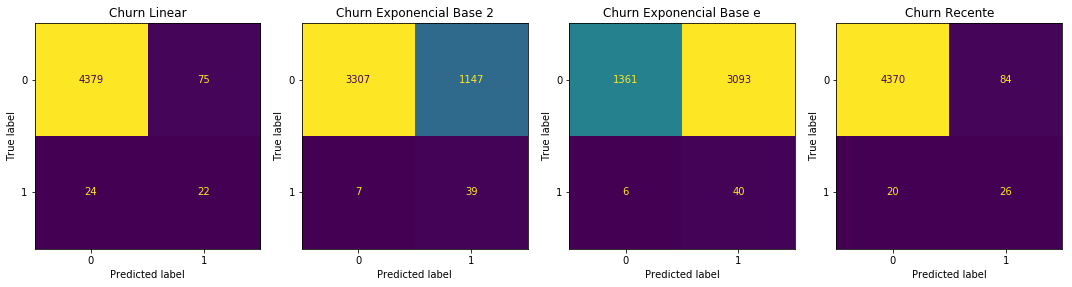

In [10]:
r2, CM = validacaoR2MatrizConfusao(
            real, 
            predict = [linear, exp2, expE, recente], 
            titulos = ["Churn Linear", "Churn Exponencial Base 2", "Churn Exponencial Base e", "Churn Recente"], 
            tamanhos = (15,8)
            )

In [11]:
print("Churn Linear:")
calculaValoresAvaliacao(linear, real)
print("\n\n")
print("Churn Exponencial Base 2:")
calculaValoresAvaliacao(exp2, real)
print("\n\n")
print("Churn Exponencial Base e:")
calculaValoresAvaliacao(expE, real)
print("\n\n")
print("Churn Recente:")
calculaValoresAvaliacao(recente, real)

Churn Linear:
Acurácia: 97.80%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.45        98.32        98.88       
1.0        22.68        47.83        30.77       



Churn Exponencial Base 2:
Acurácia: 74.36%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.79        74.25        85.14       
1.0        3.29         84.78        6.33        



Churn Exponencial Base e:
Acurácia: 31.13%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.56        30.56        46.76       
1.0        1.28         86.96        2.52        



Churn Recente:
Acurácia: 97.69%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.54        98.11        98.82       
1.0        23.64        56.52        33.33       
